### Training a binary classifier with the Sarcasm Dataset

In [1]:
#importing libraries

import json
import io
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
file_path="D:\\Tensorflow_Works\\8-Sentiment_in_Text\\sarcasm.json"

with open(file_path, "r") as file:
    data = json.load(file)

data[0]    


{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [3]:
sentence=[]
label=[]
for item in data:
    sentence.append(item['headline'])
    label.append(item['is_sarcastic'])


##### Setting the parameters

In [4]:
#setting parameters to easily tweak them when needed

#number of examples to use for training
training_size = 20000

#vocabulary size of tokenizer
vocab_size=10000

#maximum length of the padded sequences
max_length = 32

#output dimensions of the embedding layer
embedding_dims = 16

##### Splitting the dataset

In [5]:
#split the sentences

train_sentences = sentence[:training_size]
test_sentences = sentence[training_size:]

train_labels = label[:training_size]
test_labels = label[training_size:]

##### Preprocessing the train and test sets

In [6]:
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size, output_sequence_length=max_length)

#generating vocabulary based on training set
vectorize_layer.adapt(train_sentences)

In [11]:
#converting them to sequences
train_sequences = vectorize_layer(train_sentences)
test_sequences = vectorize_layer(test_sentences)


In [12]:
#combining input-output pairs for training

train_dataset_vectorized = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels))
test_dataset_vectorized = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels))

In [14]:
#viewing 2 examples

for example in train_dataset_vectorized.take(2):
    print(example)
    print()

(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 319,    1,  943, 4079, 2366,   47,  366,   94, 2026,    6, 2653,
       9470,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)

(<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([   4, 7185, 3128, 3305,   28,    2,  152,    1,  358, 2902,    6,
        236,    9,  844,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)



In [15]:
#optimizing dataset for training
shuffle_buffer_size = 1000
prefetch_buffer_size = tf.data.AUTOTUNE
batch_size = 32

train_dataset_final = (train_dataset_vectorized
                       .cache()
                       .shuffle(shuffle_buffer_size)
                       .batch(batch_size)
                       .prefetch(prefetch_buffer_size)
                       )


test_dataset_final = (test_dataset_vectorized
                       .cache()
                       .batch(batch_size)
                       .prefetch(prefetch_buffer_size)
                       )

##### Building and compiling the model

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dims),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              metrics=['accuracy'],
              optimizer="adam")

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 32, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,433 (626.69 KB)

 Trainable params: 160,433 (626.69 KB)

 Non-trainable params: 0 (0.00 B)

##### Training the model

In [17]:
history = model.fit(train_dataset_final,
                    epochs=10,
                    validation_data = test_dataset_final)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7028 - loss: 0.5664 - val_accuracy: 0.8201 - val_loss: 0.4237
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8569 - loss: 0.3474 - val_accuracy: 0.8492 - val_loss: 0.3611
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8971 - loss: 0.2658 - val_accuracy: 0.8504 - val_loss: 0.3516
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9153 - loss: 0.2212 - val_accuracy: 0.8495 - val_loss: 0.3603
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9246 - loss: 0.1950 - val_accuracy: 0.8474 - val_loss: 0.3757
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9400 - loss: 0.1655 - val_accuracy: 0.8484 - val_loss: 0.3944
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9462 - loss: 0.1486 - val_accuracy: 0.8326 - val_loss: 0.4432
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9526 - loss: 0.1315 - val_accuracy: 0.

##### Accuracy and Loss Plots

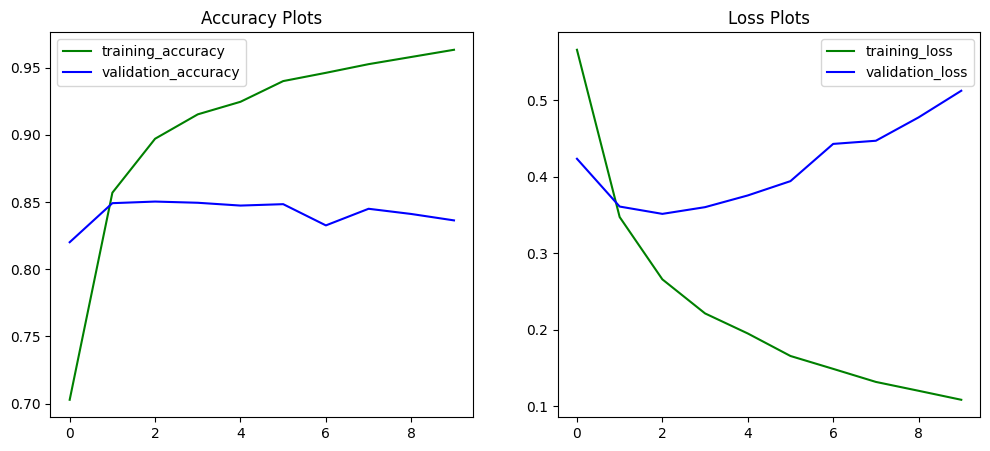

In [23]:
def visualize(history):

    plt.subplots(1,2,figsize=(12,5))
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))

    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy, "g", label="training_accuracy")
    plt.plot(epochs, val_accuracy, 'b', label="validation_accuracy")
    plt.title("Accuracy Plots")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, "g", label="training_loss")
    plt.plot(epochs, val_loss, 'b', label="validation_loss")
    plt.title("Loss Plots")
    plt.legend()


visualize(history)
